In [1]:
# Importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.decomposition import PCA

In [2]:
#Read train and test data
data_train = pd.read_csv("train (1).csv")
data_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
data_train.shape

(69999, 172)

In [4]:
data_test = pd.read_csv("test (1).csv")
data_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [5]:
data_test.shape

(30000, 171)

In [6]:
data_train.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      69999 non-null  object
 1   last_date_of_month_7      69600 non-null  object
 2   last_date_of_month_8      69266 non-null  object
 3   date_of_last_rech_6       68898 non-null  object
 4   date_of_last_rech_7       68765 non-null  object
 5   date_of_last_rech_8       67538 non-null  object
 6   date_of_last_rech_data_6  17568 non-null  object
 7   date_of_last_rech_data_7  17865 non-null  object
 8   date_of_last_rech_data_8  18417 non-null  object
dtypes: object(9)
memory usage: 4.8+ MB


In [7]:
data_train.select_dtypes(include=['number']).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 163 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    circle_id           int64  
 2    loc_og_t2o_mou      float64
 3    std_og_t2o_mou      float64
 4    loc_ic_t2o_mou      float64
 5    arpu_6              float64
 6    arpu_7              float64
 7    arpu_8              float64
 8    onnet_mou_6         float64
 9    onnet_mou_7         float64
 10   onnet_mou_8         float64
 11   offnet_mou_6        float64
 12   offnet_mou_7        float64
 13   offnet_mou_8        float64
 14   roam_ic_mou_6       float64
 15   roam_ic_mou_7       float64
 16   roam_ic_mou_8       float64
 17   roam_og_mou_6       float64
 18   roam_og_mou_7       float64
 19   roam_og_mou_8       float64
 20   loc_og_t2t_mou_6    float64
 21   loc_og_t2t_mou_7    float64
 22   loc_og_t2t_mou_8    float64
 23   loc_og_t2m_mou_6    float64
 24   

In [8]:
data_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [9]:
#EDA process

#Checking Percentage of null|na values in column
(((data_train.isnull() | data_train.isna()).sum() * 100) / data_train.index.size).loc[lambda x : x>0].sort_values(ascending=False)

max_rech_data_6             74.902499
fb_user_6                   74.902499
date_of_last_rech_data_6    74.902499
av_rech_amt_data_6          74.902499
night_pck_user_6            74.902499
count_rech_2g_6             74.902499
total_rech_data_6           74.902499
arpu_2g_6                   74.902499
count_rech_3g_6             74.902499
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
count_rech_2g_7             74.478207
av_rech_amt_data_7          74.478207
max_rech_data_7             74.478207
total_rech_data_7           74.478207
arpu_2g_7                   74.478207
date_of_last_rech_data_7    74.478207
night_pck_user_7            74.478207
fb_user_7                   74.478207
count_rech_3g_7             74.478207
total_rech_data_8           73.689624
max_rech_data_8             73.689624
date_of_last_rech_data_8    73.689624
count_rech_2g_8             73.689624
fb_user_8                   73.689624
arpu_3g_8                   73.689624
count_rech_3

In [10]:
#Checking data in columns having null values
for i in data_train.columns:
    print(i,data_train[i].unique())

id [    0     1     2 ... 69996 69997 69998]
circle_id [109]
loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
arpu_6 [ 31.277   0.     60.806 ... 372.088 238.575 168.269]
arpu_7 [ 87.009 122.787 103.176 ... 258.374 245.414  42.815]
arpu_8 [  7.527  42.953   0.    ... 279.782 145.062 167.961]
onnet_mou_6 [ 48.58   0.     0.53 ... 486.49 399.01 116.54]
onnet_mou_7 [124.38   0.    15.93 ... 453.83 378.21 283.63]
onnet_mou_8 [  1.29   0.     6.13 ... 458.79 380.99 232.63]
offnet_mou_6 [ 32.24   0.    53.99 ... 617.98 360.88 575.46]
offnet_mou_7 [ 96.68  25.99  82.05 ... 772.53 645.89 236.61]
offnet_mou_8 [  2.33  30.89   0.   ...  79.16 783.66 263.84]
roam_ic_mou_6 [  0.    53.64  28.26 ... 221.03  48.39 377.24]
roam_ic_mou_7 [  0.    11.31   7.23 ...  64.53 189.64  37.41]
roam_ic_mou_8 [  0.    47.81   3.46 ... 199.44  51.84 506.26]
roam_og_mou_6 [  0.

loc_ic_t2f_mou_6 [  0.     0.35   7.23 ... 105.14  91.13 339.11]
loc_ic_t2f_mou_7 [  0.     1.66   0.81 ...  52.41  70.04 236.16]
loc_ic_t2f_mou_8 [  0.     3.4    6.14 ... 108.84  70.61 147.74]
loc_ic_mou_6 [  3.26   3.44  94.38 ... 578.68  97.24 529.48]
loc_ic_mou_7 [ 24.76  39.44  31.34 ... 548.26 270.41 334.09]
loc_ic_mou_8 [ 24.71  25.03  30.01 ... 367.01 257.76 412.01]
std_ic_t2t_mou_6 [  0.    11.69   3.58 ...  53.03 182.64  40.93]
std_ic_t2t_mou_7 [  7.61   0.     4.34 ...  56.03  62.98 283.79]
std_ic_t2t_mou_8 [  0.21   0.     2.95 ...  33.53 164.66  65.14]
std_ic_t2m_mou_6 [  7.46   0.    18.21 ... 148.74  34.34 144.89]
std_ic_t2m_mou_7 [ 19.96   0.     2.48 ...  97.13 406.19 166.54]
std_ic_t2m_mou_8 [ 14.96   0.     6.38 ... 512.04 138.86  53.86]
std_ic_t2f_mou_6 [ 0.    0.33  3.51 ... 24.56 35.49 33.43]
std_ic_t2f_mou_7 [ 0.    6.44  0.18 ... 12.85 60.91 74.81]
std_ic_t2f_mou_8 [ 0.    8.13  2.49 ... 54.06 57.01 36.86]
std_ic_t2o_mou_6 [ 0. nan]
std_ic_t2o_mou_7 [ 0. nan]
s

count_rech_3g_8 [nan  0.  2.  1.  6.  5.  8.  3.  4.  7. 42.  9. 10. 11. 16. 29. 15. 13.
 18. 12. 20. 17. 23. 19. 14. 21. 30. 25. 45. 24.]
av_rech_amt_data_6 [       nan 1.7500e+02 1.9800e+02 9.8000e+01 1.5400e+02 1.4500e+02
 2.3000e+01 2.0500e+02 7.5000e+01 5.0500e+02 3.0800e+02 1.2300e+02
 3.9600e+02 1.8600e+02 1.0000e+02 1.2500e+02 1.9600e+02 1.4000e+01
 2.2900e+02 2.5000e+01 1.7000e+01 5.3000e+02 2.5200e+02 2.0500e+01
 2.6400e+02 5.8000e+01 1.0080e+03 8.4000e+01 3.4700e+02 4.6000e+01
 4.5800e+02 1.1200e+03 2.0300e+02 9.2000e+01 9.1000e+01 1.1200e+02
 3.0400e+02 2.9900e+02 2.9000e+02 2.3100e+02 1.6530e+03 4.1700e+02
 4.0600e+02 2.0000e+02 5.6000e+01 7.7000e+01 2.1800e+02 5.0000e+01
 6.4000e+01 1.7300e+02 1.1500e+02 3.4000e+01 1.1400e+02 5.5900e+02
 1.7700e+02 2.7400e+02 5.0400e+02 3.5600e+02 1.6700e+02 6.8000e+01
 4.7000e+02 1.4800e+02 6.2000e+01 1.4900e+02 8.1000e+01 3.1000e+01
 2.2700e+02 7.0700e+02 2.2000e+01 3.3000e+01 7.1000e+01 8.5500e+02
 3.0000e+02 2.9300e+02 2.7500e+02 5.83

In [11]:
data_train.max()

id                          69998
circle_id                     109
loc_og_t2o_mou                0.0
std_og_t2o_mou                0.0
loc_ic_t2o_mou                0.0
last_date_of_month_6    6/30/2014
arpu_6                  27731.088
arpu_7                  35145.834
arpu_8                  33543.624
onnet_mou_6               7376.71
onnet_mou_7               8157.78
onnet_mou_8              10752.56
offnet_mou_6              8362.36
offnet_mou_7              7043.98
offnet_mou_8             14007.34
roam_ic_mou_6             2850.98
roam_ic_mou_7             4155.83
roam_ic_mou_8             4169.81
roam_og_mou_6             3775.11
roam_og_mou_7             2812.04
roam_og_mou_8             5337.04
loc_og_t2t_mou_6          6431.33
loc_og_t2t_mou_7          7400.66
loc_og_t2t_mou_8         10752.56
loc_og_t2m_mou_6          4696.83
loc_og_t2m_mou_7          4557.14
loc_og_t2m_mou_8          4961.33
loc_og_t2f_mou_6           617.58
loc_og_t2f_mou_7           815.33
loc_og_t2f_mou

In [12]:
print(data_train.id.duplicated().sum()) #checking if any duplicate rows based on id column

0


In [13]:
#Dropping columns which has all values 0
drop_0_columns = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                  'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                 'std_ic_t2o_mou_7','std_ic_t2o_mou_8']
data_train.drop(drop_0_columns,axis=1,inplace = True)
data_test.drop(drop_0_columns,axis=1,inplace = True)

In [14]:
#fill 0 to nan value
fill_0_columns = data_train.select_dtypes(include=['number']).columns
data_train[fill_0_columns] = data_train[fill_0_columns].fillna(0)

In [15]:
fill_0_columns = data_test.select_dtypes(include=['number']).columns

data_test[fill_0_columns] = data_test[fill_0_columns].fillna(0)

In [16]:
for i in data_train.select_dtypes(include=['object']).columns:
    print(i,data_train[i].unique())

last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
date_of_last_rech_6 ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
date_of_last_rech_7 ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' nan '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014'
 '7/12/2014' '7/24/2014' '7/15/2014' '7/1/2014' '7/23/2014' '7/9/2014'
 '7/8/2014' '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014'
 '7/2/2014' '7/3/2014']
date_of_last_rech_8 ['8/24/2014' '8/26/2014' '8/25/2014' '8/30/2014' '8/28/2014' '8/19/2014'
 '8/5/2014' '8/27/2

In [17]:
data_train['last_date_of_month_7'] = data_train['last_date_of_month_7'].fillna('7/31/2014')
data_train['last_date_of_month_8'] = data_train['last_date_of_month_8'].fillna('8/31/2014')
data_train['date_of_last_rech_6'] = data_train['date_of_last_rech_6'].fillna('6/30/2014')
data_train['date_of_last_rech_7'] = data_train['date_of_last_rech_7'].fillna('7/31/2014')
data_train['date_of_last_rech_8'] = data_train['date_of_last_rech_8'].fillna('8/31/2014')
data_train['date_of_last_rech_data_6'] = data_train['date_of_last_rech_data_6'].fillna('6/30/2014')
data_train['date_of_last_rech_data_7'] = data_train['date_of_last_rech_data_7'].fillna('7/31/2014')
data_train['date_of_last_rech_data_8'] = data_train['date_of_last_rech_data_8'].fillna('8/31/2014')

data_test['last_date_of_month_7'] = data_test['last_date_of_month_7'].fillna('7/31/2014')
data_test['last_date_of_month_8'] = data_test['last_date_of_month_8'].fillna('8/31/2014')
data_test['date_of_last_rech_6'] = data_test['date_of_last_rech_6'].fillna('6/30/2014')
data_test['date_of_last_rech_7'] = data_test['date_of_last_rech_7'].fillna('7/31/2014')
data_test['date_of_last_rech_8'] = data_test['date_of_last_rech_8'].fillna('8/31/2014')
data_test['date_of_last_rech_data_6'] = data_test['date_of_last_rech_data_6'].fillna('6/30/2014')
data_test['date_of_last_rech_data_7'] = data_test['date_of_last_rech_data_7'].fillna('7/31/2014')
data_test['date_of_last_rech_data_8'] = data_test['date_of_last_rech_data_8'].fillna('8/31/2014')

In [18]:
#dropping 2 columns since thier data is not significant and all are unique values
data_train.drop(['circle_id'],axis=1,inplace=True)

data_test.drop(['circle_id'],axis=1,inplace=True)

In [19]:
data_train.shape

(69999, 162)

In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 162 entries, id to churn_probability
dtypes: float64(126), int64(27), object(9)
memory usage: 86.5+ MB


0    89.81
1    10.19
Name: churn_probability, dtype: float64


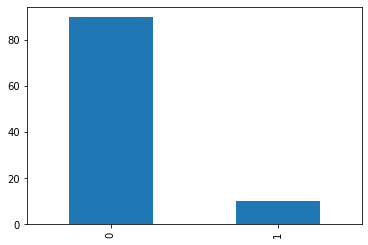

In [21]:
##Univariate Variables Starts

# target column is churn_probability we will start analysis
print(round(data_train.churn_probability.value_counts()*100/len(data_train),2))
round(data_train.churn_probability.value_counts()*100/len(data_train),2).plot.bar()
plt.show()
#Observation :
#89% is 0 churn probability
#10* is 1 churn probability

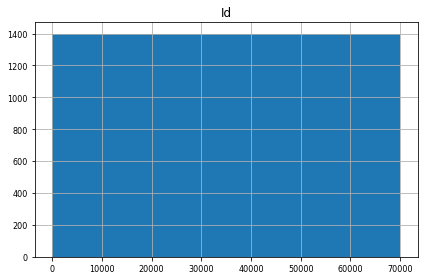

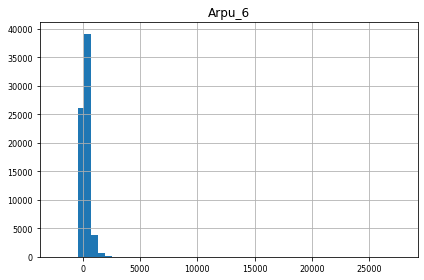

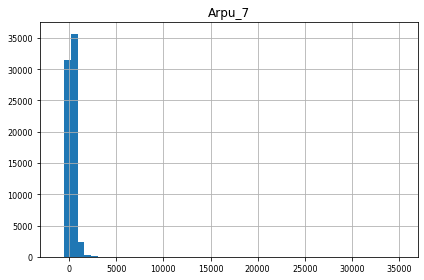

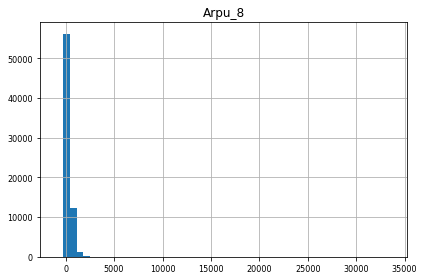

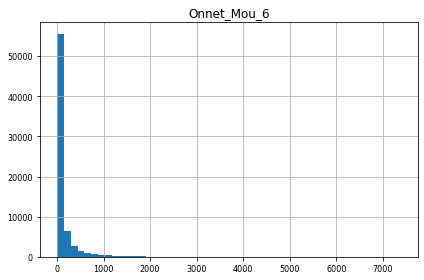

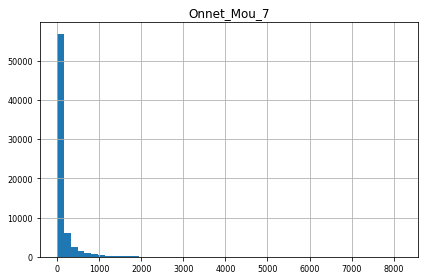

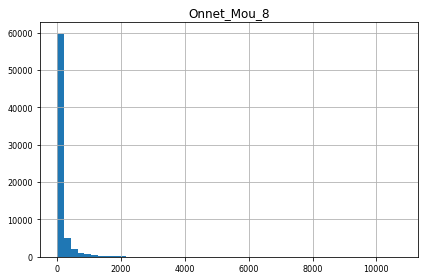

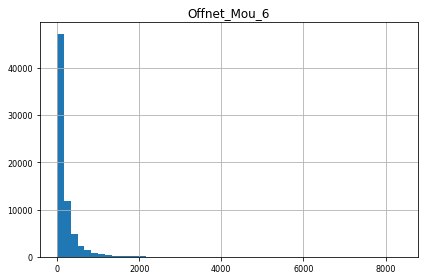

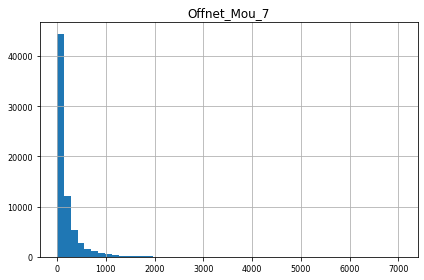

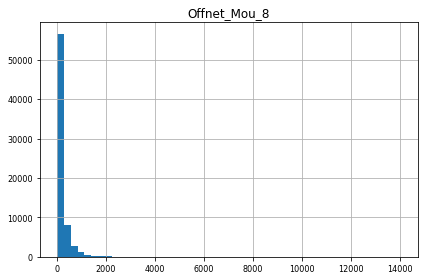

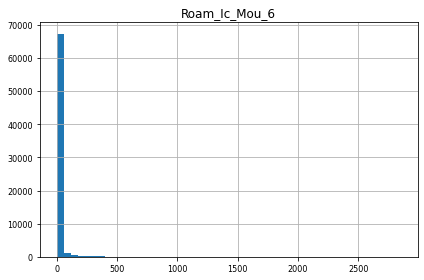

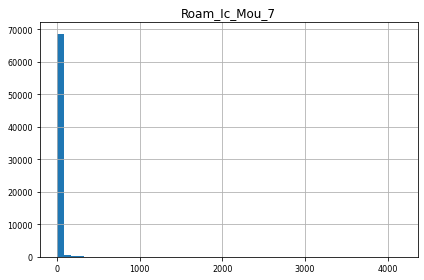

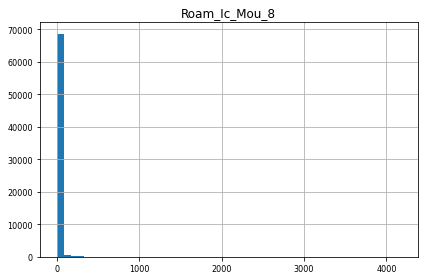

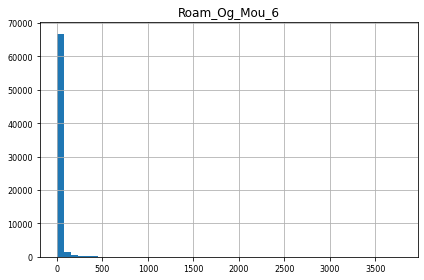

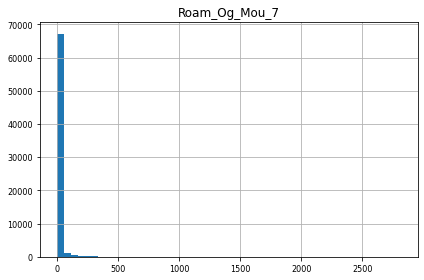

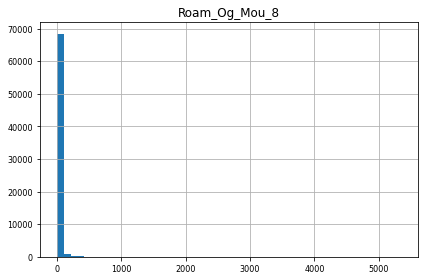

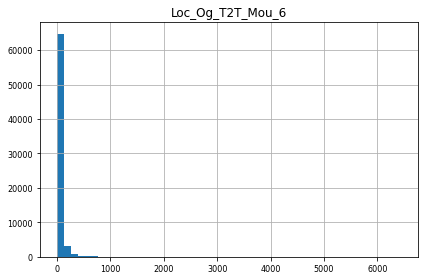

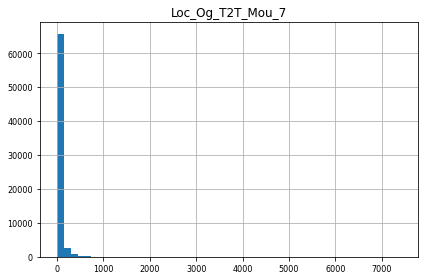

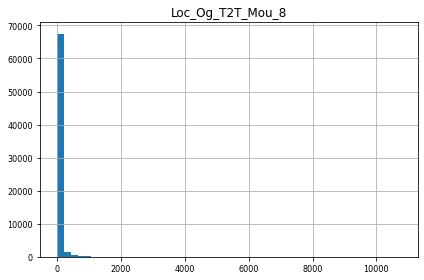

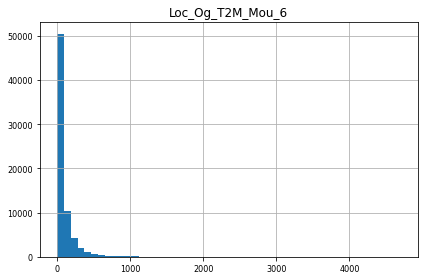

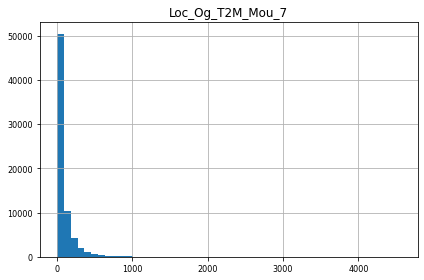

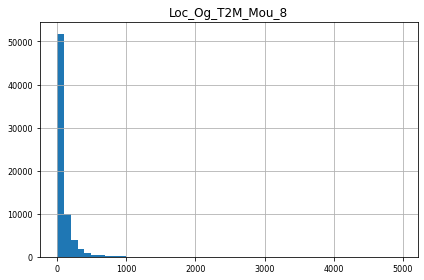

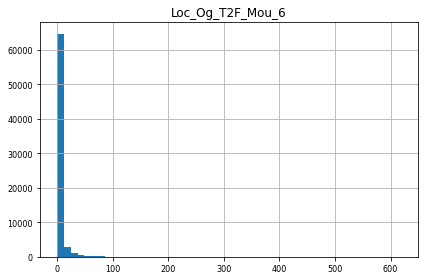

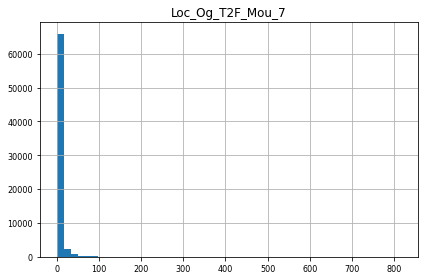

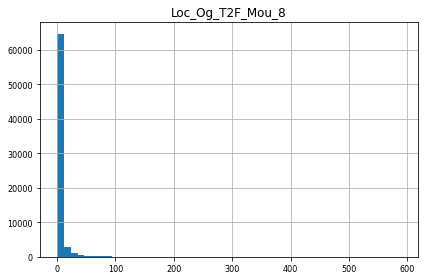

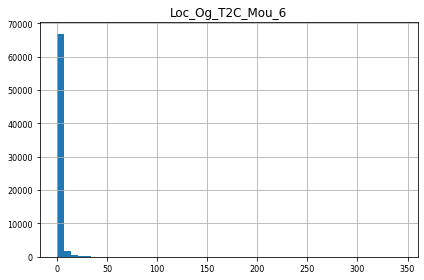

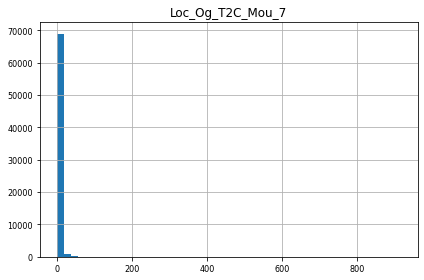

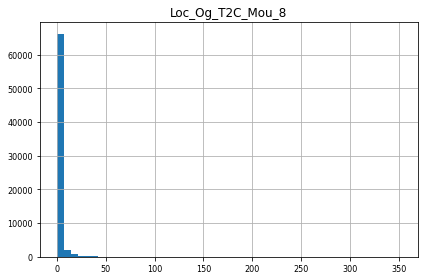

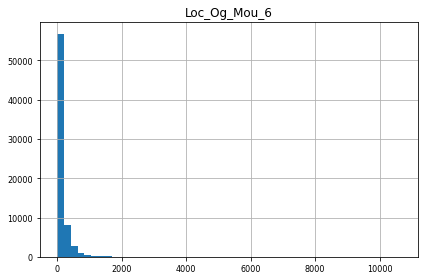

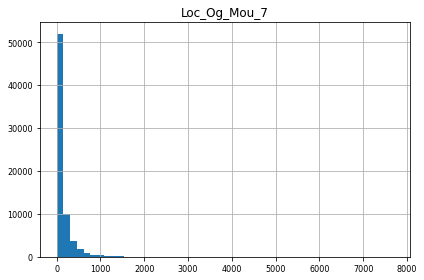

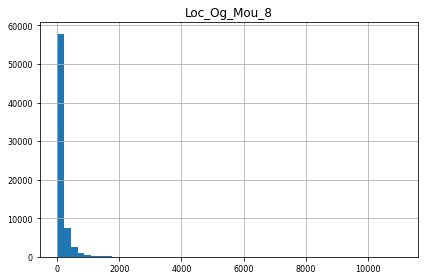

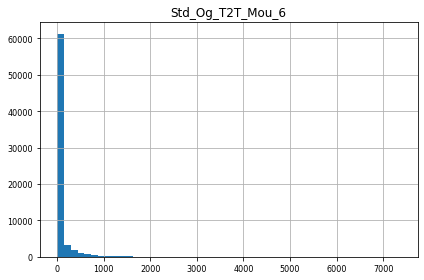

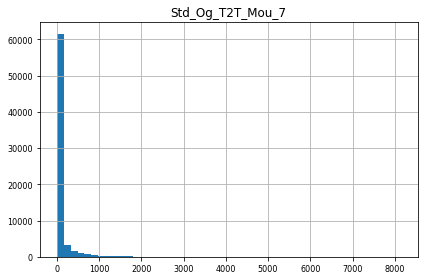

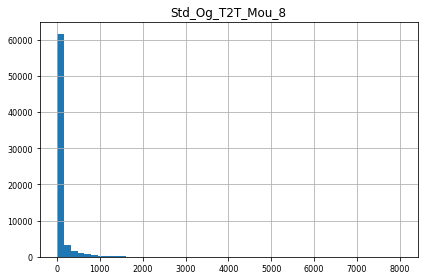

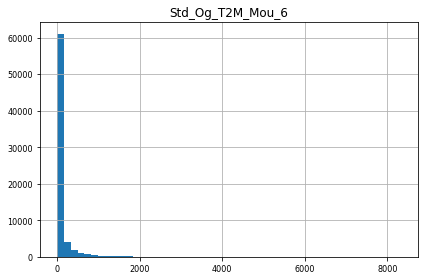

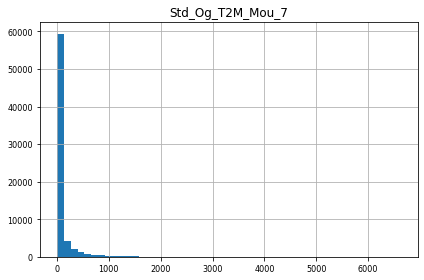

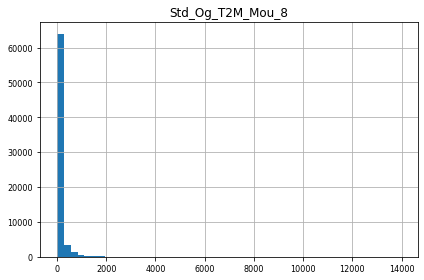

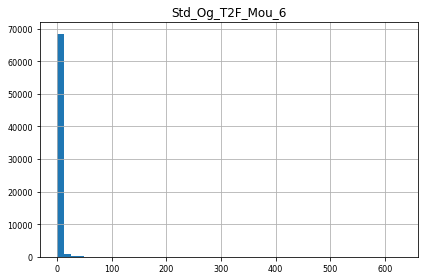

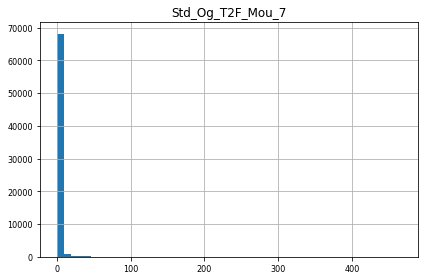

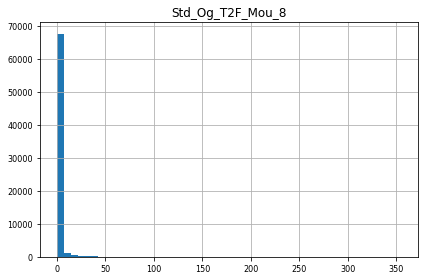

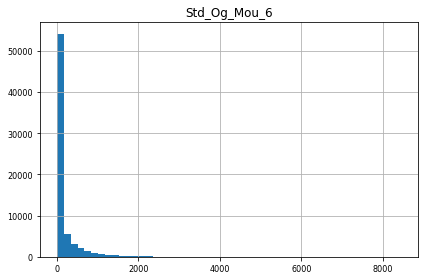

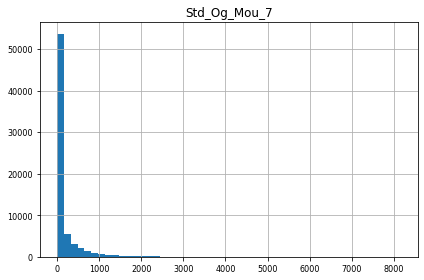

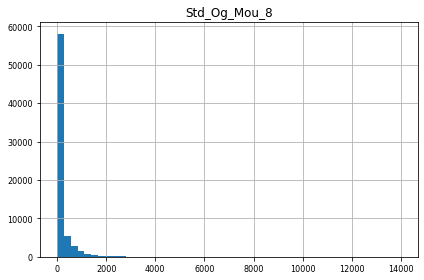

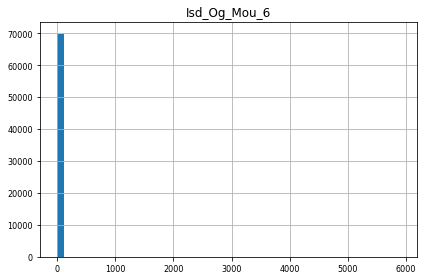

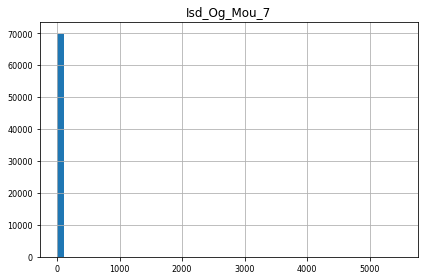

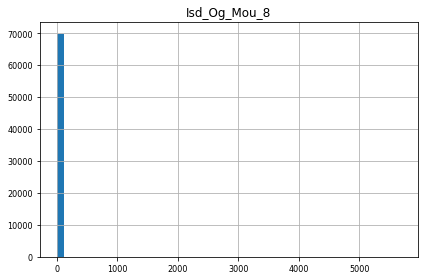

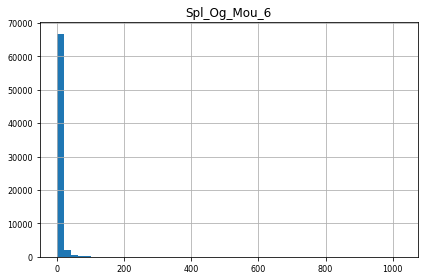

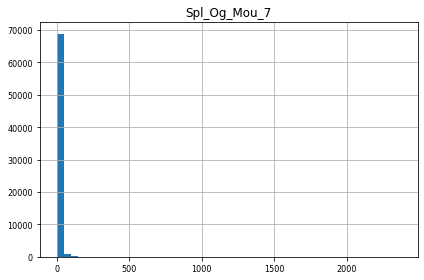

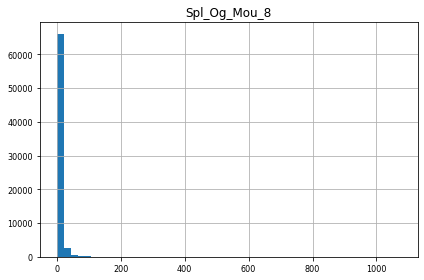

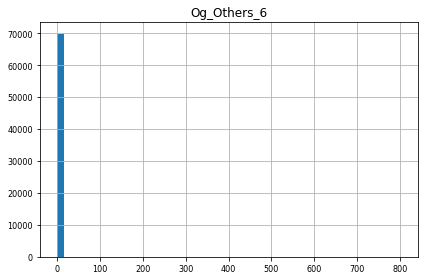

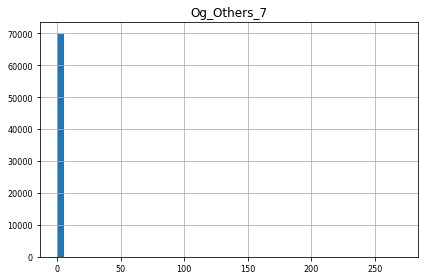

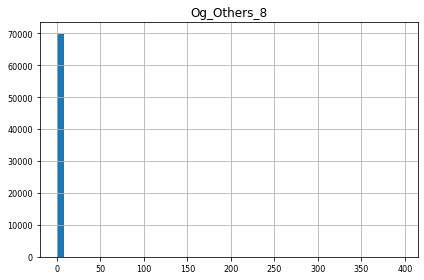

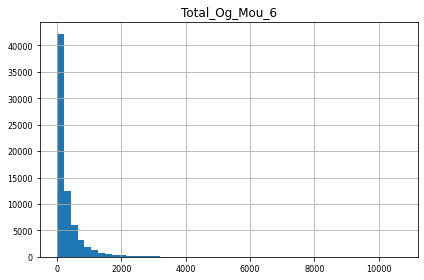

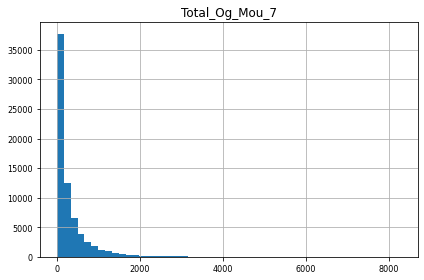

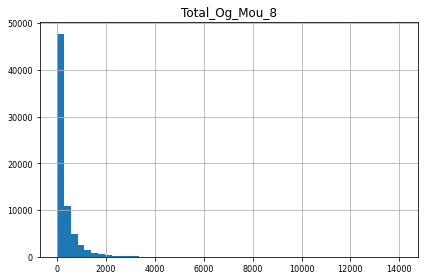

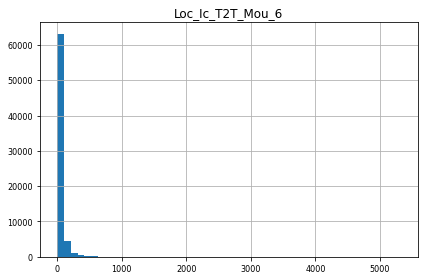

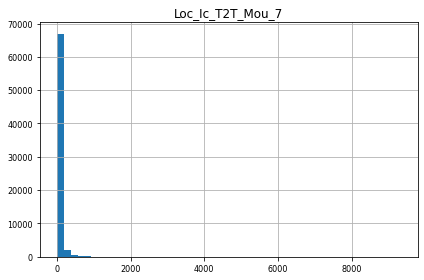

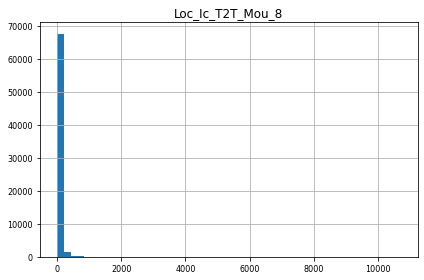

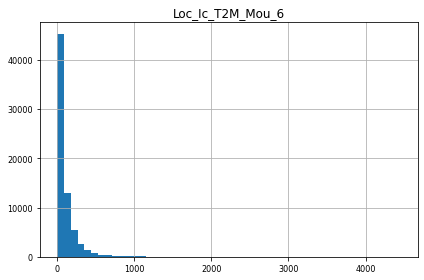

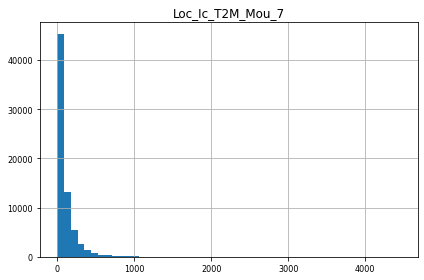

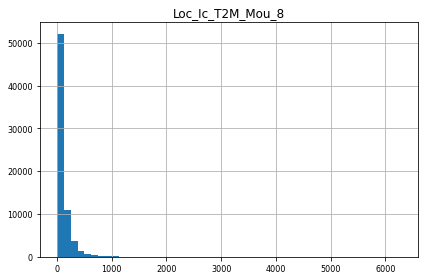

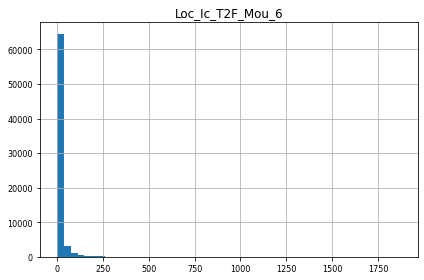

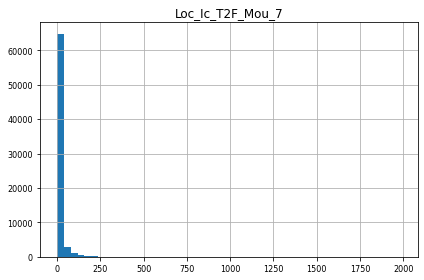

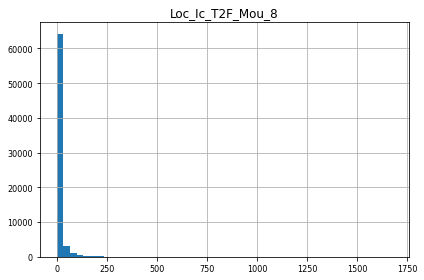

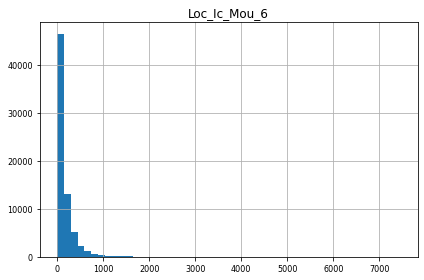

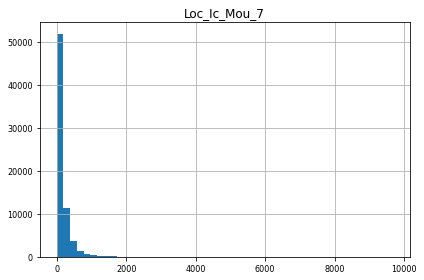

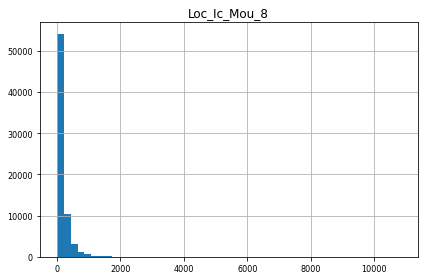

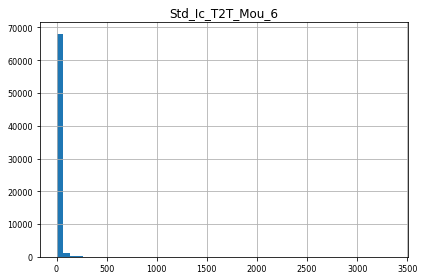

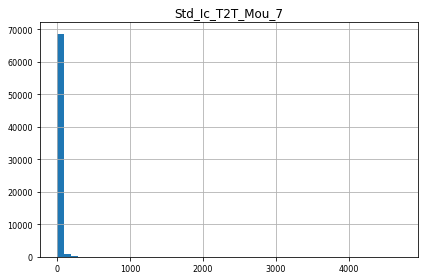

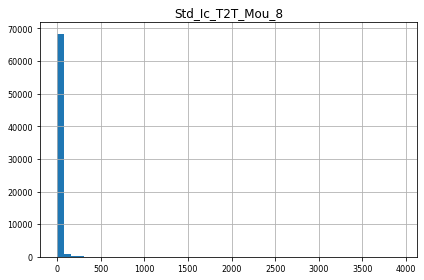

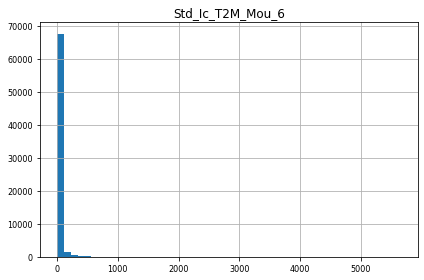

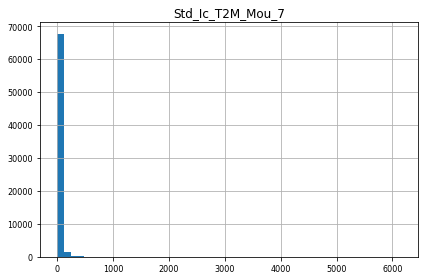

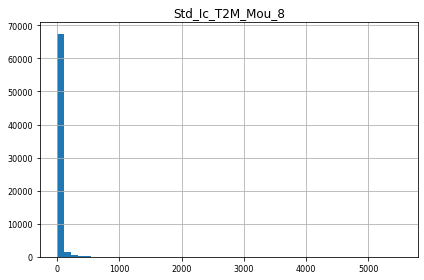

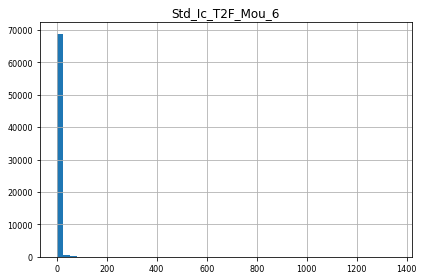

In [ ]:
#Checking hist diagran of all number columns
def plotHistChart(i):
    plt.subplot(1,1,1)
    ax = data_train[i].hist(bins=50, xlabelsize=8, ylabelsize=8)
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()
    
for i in data_train.select_dtypes(include=['number']):
    plotHistChart(i)



In [ ]:
data_train.describe()

In [ ]:
#Checking all Object columns bar graphs
def plotBarChart(i):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,1,1)
    ax = data_train[i].value_counts().plot.bar()
    ax.set_title(i.title())
    plt.tight_layout()
    plt.show()

for i in data_train.select_dtypes(include=['object']):
    plotBarChart(i)

In [ ]:
data_train.filter(regex='ic').filter(regex='_6').head()

In [ ]:
data_train.filter(regex='rech').filter(regex='_6').head()

In [ ]:
#Calculate total recharge 
data_train['total_data_rech_amt_6'] = data_train['total_rech_data_6'] * data_train['av_rech_amt_data_6']
data_train['total_data_rech_amt_7'] = data_train['total_rech_data_7'] * data_train['av_rech_amt_data_7']
data_train['total_data_rech_amt_8'] = data_train['total_rech_data_8'] * data_train['av_rech_amt_data_8']
data_train['total_rech_6'] = data_train[['total_data_rech_amt_6','total_rech_amt_6']].sum(axis=1)
data_train['total_rech_7'] = data_train[['total_data_rech_amt_7','total_rech_amt_7']].sum(axis=1)
data_train['total_rech_8'] = data_train[['total_data_rech_amt_8','total_rech_amt_8']].sum(axis=1)

drop_data_rech_columns = ['total_rech_data_6','av_rech_amt_data_6',
                         'total_rech_data_7','av_rech_amt_data_7',
                         'total_rech_data_8','av_rech_amt_data_8',
                         'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
                         'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 
                         'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
data_train.drop(drop_data_rech_columns,axis=1,inplace=True)

In [ ]:
data_test['total_data_rech_amt_6'] = data_test['total_rech_data_6'] * data_test['av_rech_amt_data_6']
data_test['total_data_rech_amt_7'] = data_test['total_rech_data_7'] * data_test['av_rech_amt_data_7']
data_test['total_data_rech_amt_8'] = data_test['total_rech_data_8'] * data_test['av_rech_amt_data_8']
data_test['total_rech_6'] = data_test[['total_data_rech_amt_6','total_rech_amt_6']].sum(axis=1)
data_test['total_rech_7'] = data_test[['total_data_rech_amt_7','total_rech_amt_7']].sum(axis=1)
data_test['total_rech_8'] = data_test[['total_data_rech_amt_8','total_rech_amt_8']].sum(axis=1)

data_test.drop(drop_data_rech_columns,axis=1,inplace=True)

In [ ]:
#Calculate Roaming
data_train['roam_6'] = data_train[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_train['roam_7'] = data_train[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_train['roam_8'] = data_train[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)

drop_roam_columns =['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
                    'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']
data_train.drop(drop_roam_columns,axis=1,inplace=True)

In [ ]:
data_test['roam_6'] = data_test[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_test['roam_7'] = data_test[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)
data_test['roam_8'] = data_test[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1).apply(lambda x: 1 if (x>0) else 0)

data_test.drop(drop_roam_columns,axis=1,inplace=True)

In [ ]:
#Calculate Local
data_train['local_6'] = data_train[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['local_7'] = data_train[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['local_8'] = data_train[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_loc_columns = ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 
                    'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
                    'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
                    'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 
                    'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
                    'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
                    'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 
                    'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 
                    'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']
data_train.drop(drop_loc_columns,axis=1,inplace=True)

In [ ]:
data_test['local_6'] = data_test[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['local_7'] = data_test[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['local_8'] = data_test[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_loc_columns,axis=1,inplace=True)

In [ ]:
#Calculate STD
data_train['std_6'] = data_train[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['std_7'] = data_train[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['std_8'] = data_train[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_std_columns = ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 
                    'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
                    'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 
                    'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 
                    'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
                    'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 
                    'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 
                    'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']
data_train.drop(drop_std_columns,axis=1,inplace=True)

In [ ]:
data_test['std_6'] = data_test[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['std_7'] = data_test[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['std_8'] = data_test[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_std_columns,axis=1,inplace=True)

In [ ]:
#Calculate SPL
data_train['spl_6'] = data_train[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['spl_7'] = data_train[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_train['spl_8'] = data_train[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

drop_spl_columns = ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 
                    'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 
                    'og_others_6', 'og_others_7', 'og_others_8',  
                    'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 
                    'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 
                    'ic_others_6', 'ic_others_7', 'ic_others_8']
data_train.drop(drop_spl_columns,axis=1,inplace=True)

In [ ]:
data_test['spl_6'] = data_test[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['spl_7'] = data_test[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)
data_test['spl_8'] = data_test[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1).apply(lambda x: 1 if (x > 0) else 0)

data_test.drop(drop_spl_columns,axis=1,inplace=True)

In [ ]:
#Calculate Data usage
data_train['data_used_6'] = data_train[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
data_train['data_used_7'] = data_train[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
data_train['data_used_8'] = data_train[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)
drop_data_usage_columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 
                           'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 
                           'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']
data_train.drop(drop_data_usage_columns,axis=1,inplace=True)

In [ ]:
data_test['data_used_6'] = data_test[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
data_test['data_used_7'] = data_test[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
data_test['data_used_8'] = data_test[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)

data_test.drop(drop_data_usage_columns,axis=1,inplace=True)

In [ ]:
drop_others_columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                    'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                    'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                    'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
                    'offnet_mou_6','offnet_mou_7','offnet_mou_8',
                    'fb_user_6','fb_user_7','fb_user_8',
                    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
                    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
data_train.drop(drop_others_columns,axis=1,inplace=True)

data_test.drop(drop_others_columns,axis=1,inplace=True)

In [ ]:
data_train.info(verbose=True)

In [ ]:
data_train.head()

In [ ]:
#Bivariate Analysis

def plotBoxChart(xAxis,yAxis):
    plt.figure(figsize=(15, 5))
    ax = sns.boxplot(y=yAxis, x=xAxis, data =data_train)
    ax.set_title(xAxis.title() + ' V/S ' + yAxis.title())
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)    
    plt.tight_layout()
    plt.show()

number_columns = ['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'total_rech_6', 'total_rech_7', 'total_rech_8',
       'roam_6', 'roam_7', 'roam_8', 'local_6', 'local_7', 'local_8', 'std_6',
       'std_7', 'std_8', 'spl_6', 'spl_7', 'spl_8', 'data_used_6',
       'data_used_7', 'data_used_8']

#for i in number_columns:
#    plotBoxChart(i,'churn_probability') 


In [ ]:
data_train.corr()

In [ ]:
X_train = data_train.drop(['churn_probability'], axis=1)
y_train = data_train['churn_probability']

X_test = data_test

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

In [ ]:
#Scaling 
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [ ]:
X_train.head()

In [ ]:
#PCA

pca = PCA(random_state=42)

In [ ]:
pca.fit(X_train)

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=28, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
pca_final = IncrementalPCA(n_components=28)

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)

In [ ]:
df_train_pca.shape

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
corrmat.shape

In [ ]:
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
learner_pca = LogisticRegression()

In [ ]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [ ]:
round(model_pca.score(df_train_pca, y_train) * 100, 2)

In [ ]:
y_pred = learner_pca.predict_proba(df_train_pca)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_df.head()

In [ ]:
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

In [ ]:
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

In [ ]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

In [ ]:
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
y_pred_final.head()

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
def print_score(y_pred_final):
    '''
    print the accuracy score and confusion matrix
    '''
    '''
    training performance
    '''
    print("Train Result:\n")
    print("accuracy score: {0:.4f}\n".format(round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.Predicted), 4) * 100))
    confusion = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.Predicted)
    print("Confusion Matrix: \n {}\n".format(confusion))
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Sensitivity: {0:.4f}\n".format(round(TP / float(TP+FN), 4) * 100))
    print("Specificity: {0:.4f}\n".format(round(TN / float(TN+FP), 4) * 100))
    print("False Positive Rate : {0:.4f}\n".format(round(FP/ float(TN+FP), 4) * 100))
    print("Positive Predictive Value : {0:.4f}\n".format(round(TP / float(TP+FP), 4)* 100))
    print("Negative Predictive Value : {0:.4f}\n".format(round(TN / float(TN+ FN), 4) * 100))

In [ ]:
def print_cutoffmatrix(y_pred_final):
    cutoffmatrix_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final[i] )
        total1=sum(sum(cm))
        Accuracy = (cm[0,0] + cm[1,1]) / total1
        Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
        Sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
        Precision = precision_score(y_pred_final.churn_probability, y_pred_final[i])
        Recall = recall_score(y_pred_final.churn_probability, y_pred_final[i])
        cutoffmatrix_df.loc[i] =[i, Accuracy, Sensitivity, Specificity, Precision, Recall]

    print(cutoffmatrix_df)

    cutoffmatrix_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
    plt.show()

In [ ]:
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [ ]:
## 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

In [ ]:
print_score(y_pred_final)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [ ]:
y_test_pred = model_pca.predict_proba(df_test_pca)

In [ ]:
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_df.head()

In [ ]:
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.10 else 0)
y_test_pred_final.head()

In [ ]:
y_test_final_pca = y_test_pred_final[['id','churn_probability']]
y_test_final_pca.to_csv('submission_pca.csv',index=False)

In [ ]:
y_test_final_pca['churn_probability'].sum()/y_test_final_pca['churn_probability'].count()

In [ ]:
#PCA Again

In [ ]:
pca_again = PCA(0.9)

In [ ]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [ ]:
df_train_pca2.shape

In [ ]:
learner_pca2 = LogisticRegression()

In [ ]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [ ]:
round(model_pca2.score(df_train_pca2, y_train) * 100, 2)

In [ ]:
df_test_pca2 = pca_again.transform(X_test)

In [ ]:
df_test_pca2.shape

In [ ]:
y_pred = learner_pca2.predict_proba(df_train_pca2)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_pred_df.head()

In [ ]:
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

In [ ]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.apply( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

In [ ]:
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
y_pred_final.head()

In [ ]:
print_score(y_pred_final)
draw_roc(y_pred_final.churn_probability, y_pred_final.Predicted)
print_cutoffmatrix(y_pred_final)

In [ ]:
## 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

In [ ]:
print_score(y_pred_final)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca2[:,0], df_train_pca2[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [ ]:
y_test_pred = model_pca2.predict_proba(df_test_pca2)

In [ ]:
# Convert y_test_pred to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
y_test_pred_df.head()

In [ ]:
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.10 else 0)
y_test_pred_final.head()

In [ ]:
y_test_pred_final = pd.concat([X_test['id'],y_test_pred_df[1]], axis=1)
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_test_pred_final['churn_probability'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.10 else 0)
y_test_pred_final.head()

In [ ]:
y_test_final_pca = y_test_pred_final[['id','churn_probability']]
y_test_final_pca.to_csv('submission_pca2.csv',index=False)

In [ ]:
y_test_final_pca['churn_probability'].sum()/y_test_final_pca['churn_probability'].count()

In [ ]:
#Xgboost

In [ ]:
#To do
#Logistic Regresion -- Priyesh
#Univariate and Bivariate -- Priyesh
#Xgboost -- Priyesh
#submit score kaggle -- Priyesh
#Comments -- Chandra
#Decision Tree -- Chandra
#Random Forest -- Chandra
#SMOTE Analysis -- Chandra